# PrincipalComponentAnalysis
1. 描述：在机器学习中，主要用于数据的降维，属于一种非监督学习算法
2. 作用：
    - 通过降维，可以发现更便于人类理解的特征
    - 可视化、去噪
3. 简单原理理解：从一个坐标系（n维）转换到另一个坐标系（n维）
    - 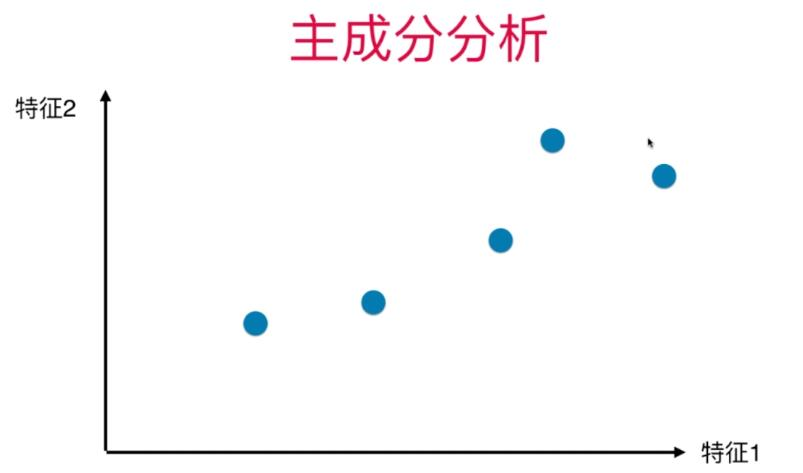
    - 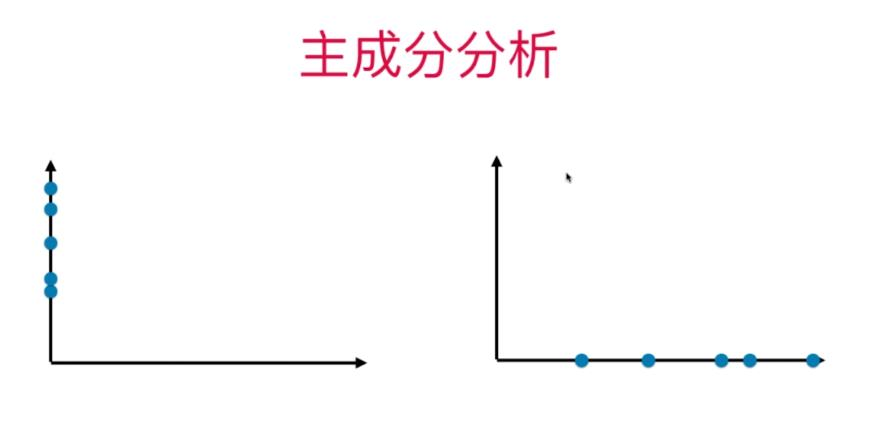
    - 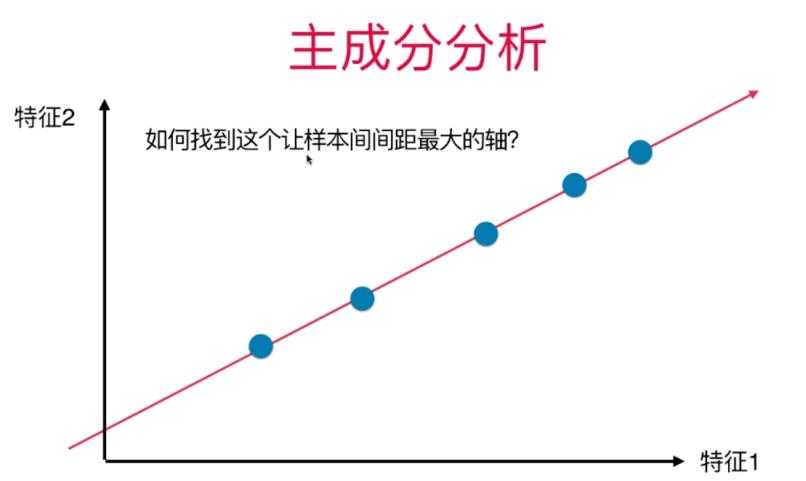
    - 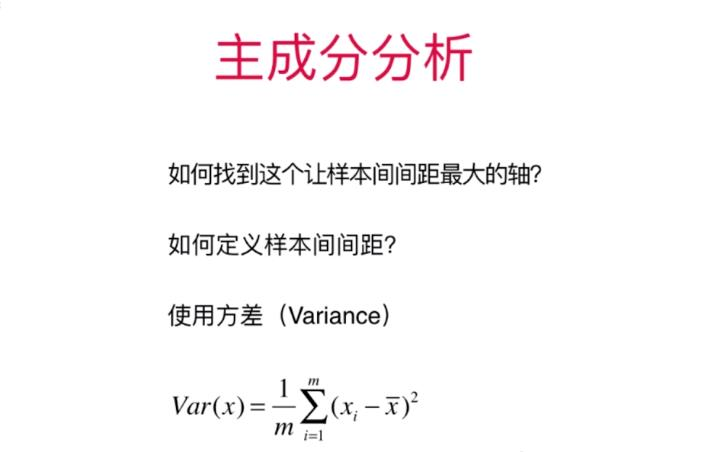
    - 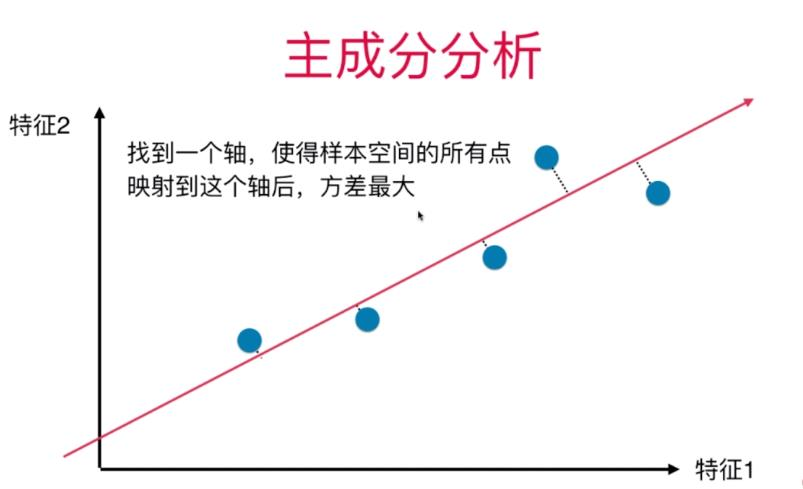
    - 将样例的均值归为0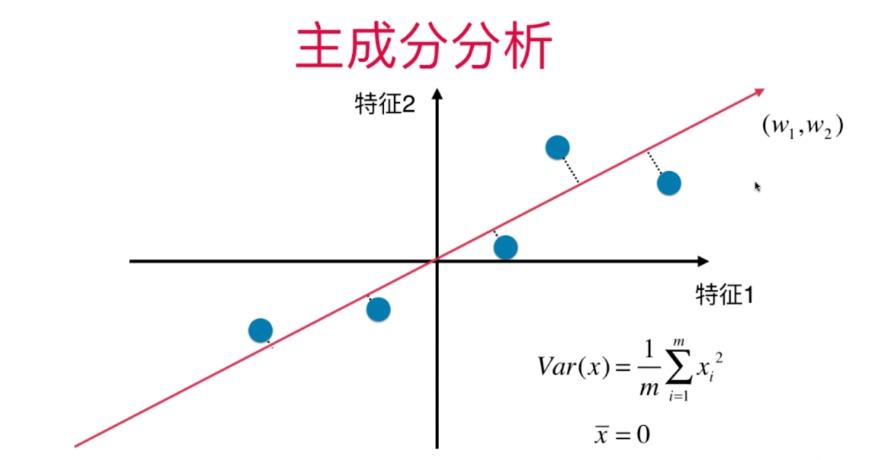
    - 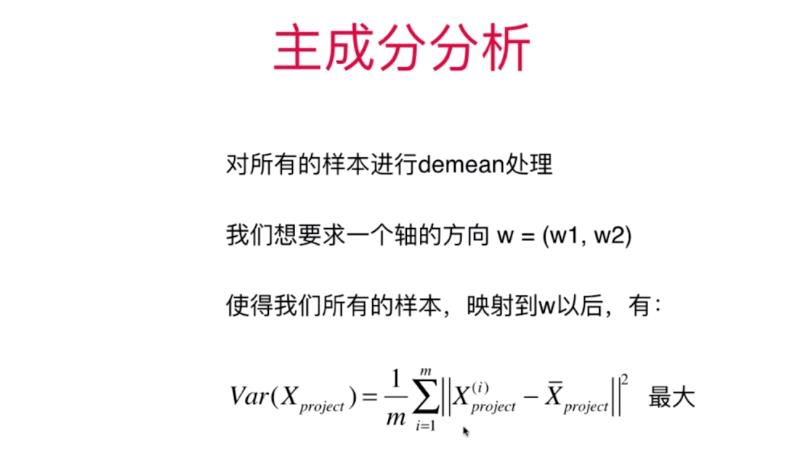
    - 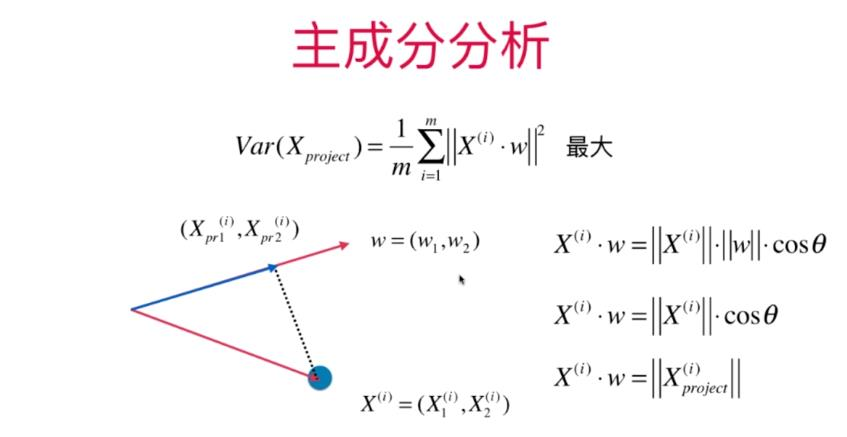
    - 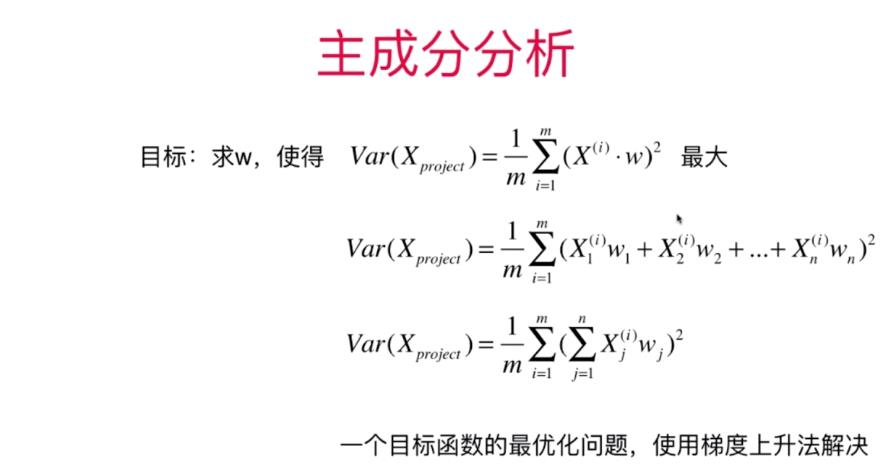

4. 使用梯度上升法解决PCA
    - 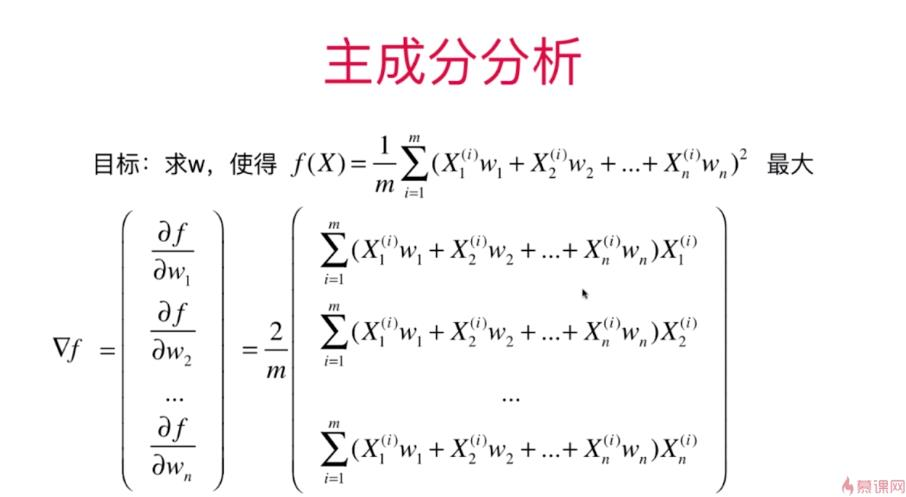
    - 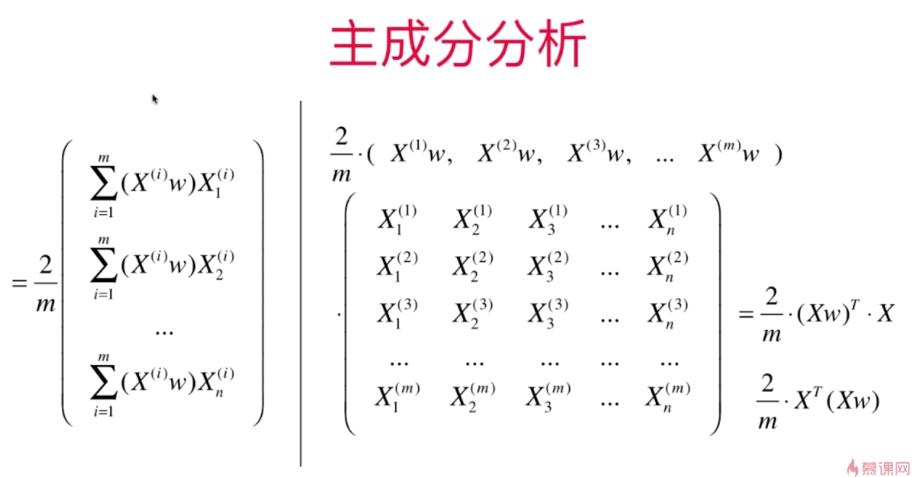
    - 注意事项：
        - 预处理：应先对数据进行demean操作
        - w的初始值应该是非零向量
        - 每次计算w之前，应该将其单位化
        - 不能使用StandardScaler标准化数据，这样会使方差为1
5. 计算数据的前n个主成分
    - 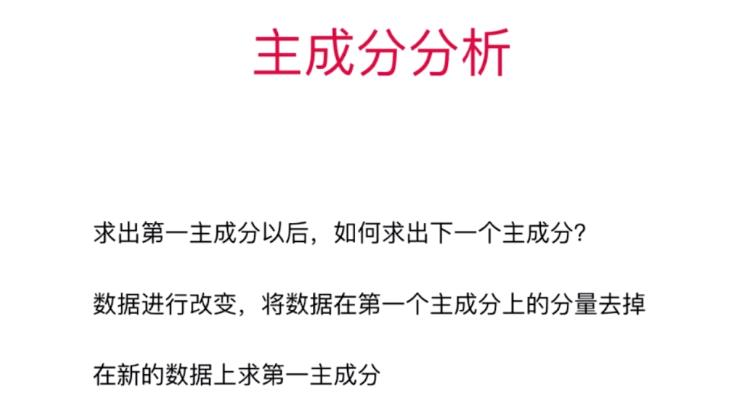
    - 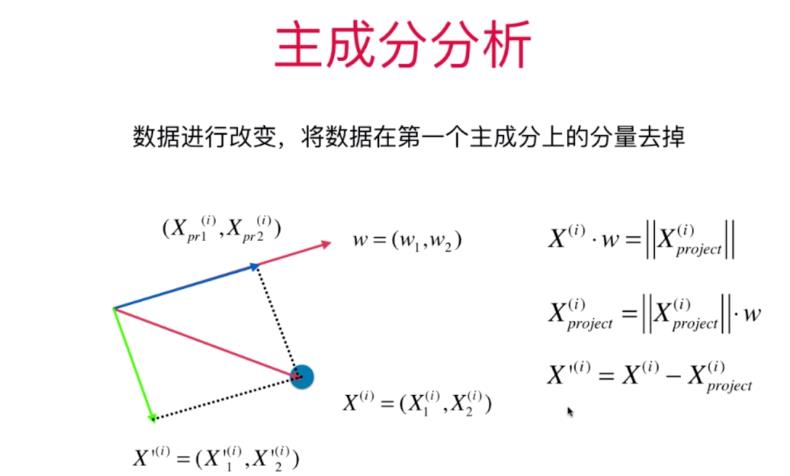
6. 高维数据映射为低维数据
    - 降维过程：信息有损失
    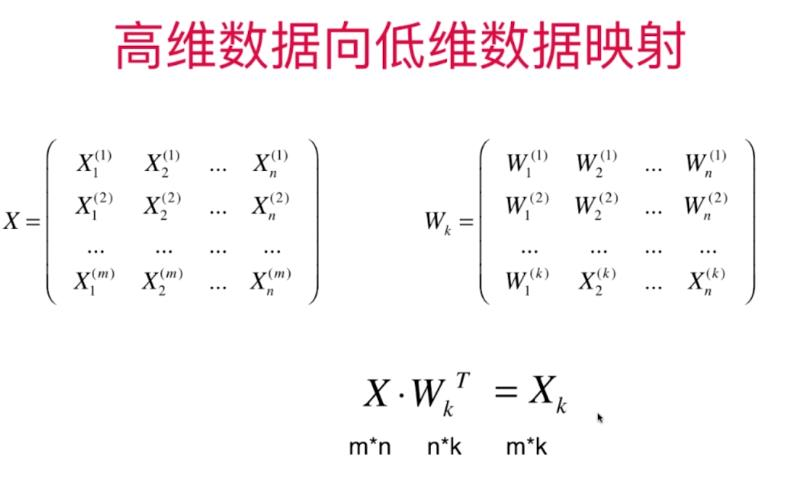 
    - 升维过程：信息不能还原完全
    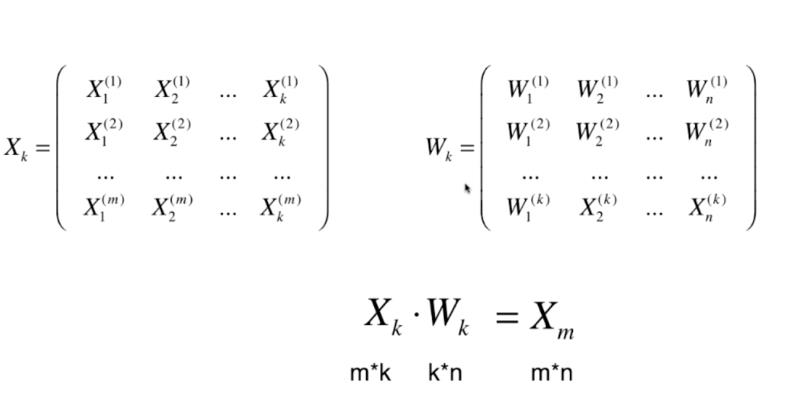
7. 去噪
    - 降维过程：降低了维度，降低了噪音，丢失了信息
8. 特征脸Eigenface：
    - 将主成分矩阵的每一行理解成一张特征脸，此特征脸可以反映样本矩阵的一些特征
    - 越靠前的主成分反映得越笼统，越靠后的反映得越细致

# 模拟实现梯度上升法求解PCA

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))  #设置2维特征
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0, 10., size=100)

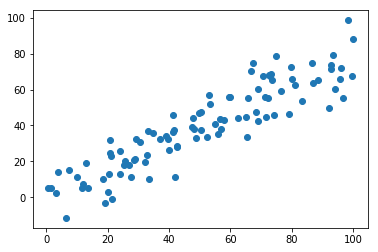

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean：将均值归零

In [8]:
def demean(X):
    return X - np.mean(X, axis=0)

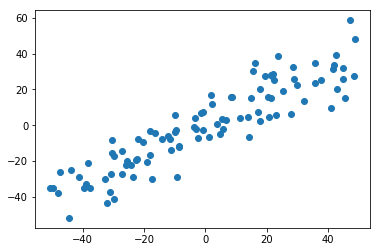

In [9]:
X_demean = demean(X)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [10]:
np.mean(X_demean[:, 0])  #第1列均值约等于0

1.8900436771218666e-14

In [13]:
np.mean(X_demean[:, 1])  #第2列均值约等于0

-3.5527136788005009e-15

### 梯度上升法

In [14]:
def f_PAC(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [15]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [16]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f_PAC(w_1, X) - f_PAC(w_2, X)) / (2 * epsilon)
    return res

In [17]:
def unitization(w):
    return w / np.linalg.norm(w)

In [18]:
def gradient_ascent(df, X, init_w, eta, n_iters=1e4, epsilon=1e-8):
    w = unitization(init_w)  #将初始向量单位化
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = unitization(w)  #每次将向量单位化
        if(abs(f_PAC(w, X) - f_PAC(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [19]:
init_w = np.random.random(X.shape[1])  #初始化w为一个非零向量
init_w

array([ 0.94965886,  0.34279313])

In [20]:
eta = 0.001
gradient_ascent(df_debug, X_demean, init_w, eta)

array([ 0.76667346,  0.64203724])

In [22]:
w = gradient_ascent(df_math, X_demean, init_w, eta)
w

array([ 0.76667346,  0.64203724])

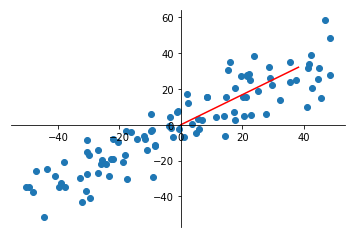

In [43]:
ax = plt.gca()  #gca:get current axis，获得当前轴对象
ax.spines['right'].set_color('none')  #设置右轴颜色为无
ax.spines['top'].set_color('none')    #设置上轴颜色为无
# ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))  #设置下轴位置
# ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))    #设置左轴位置
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*50], [0, w[1]*50], color='r')  #将单位向量w扩大50倍
plt.show()

### 简单验证上述算法

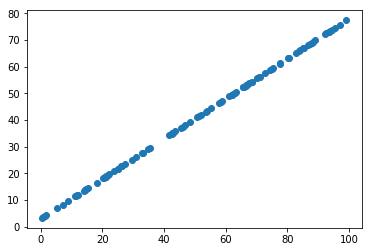

In [44]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3

plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

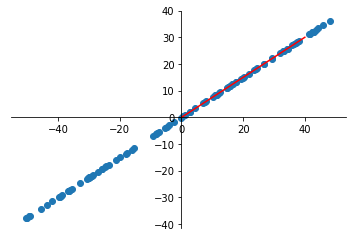

In [48]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, init_w, eta)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*50], [0, w2[1]*50], color='r')
plt.show()

# 计算前n个主成分

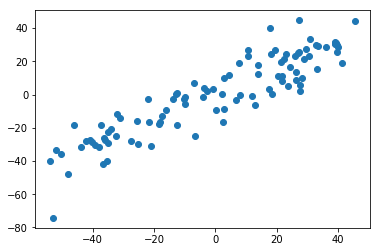

In [68]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))  #设置2维特征
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10., size=100)

def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [69]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

def unitization(w):
    return w / np.linalg.norm(w)

def first_component_ga(X, init_w, eta, n_iters=1e4, epsilon=1e-8):
    w = unitization(init_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = unitization(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [70]:
init_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component_ga(X, init_w, eta)
w

array([ 0.77245849,  0.63506526])

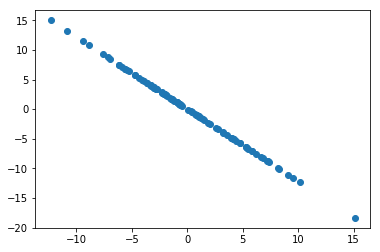

In [71]:
X2 = np.empty(X.shape)
# for i in range(len(X)):  #循环计算去掉前一主成分后的样本矩阵
#     X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w  #向量化计算去掉前一主成分后的样本矩阵
    
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [72]:
w2 = first_component_ga(X2, init_w, eta)
w2

array([-0.63506239,  0.77246084])

In [73]:
w2.dot(w)  #约等于0，即可证明这两个向量相互垂直

3.7152160594633443e-06

### 计算前n个主成分函数

In [78]:
def first_n_component_ga(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = demean(X.copy())
    res_n_component = []  #用于保存前n个主成分
    for i in range(n):
        init_w = np.random.random(X_pca.shape[1])
        w = first_component_ga(X_pca, init_w, eta)
        res_n_component.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res_n_component

In [80]:
n_component = first_n_component_ga(2, X)  #这个模拟中X只有2个特征
n_component                               #则最多可以计算2个主成分

[array([ 0.7724585 ,  0.63506525]), array([ 0.63506834, -0.77245596])]

In [81]:
n_component[1].dot(n_component[0])  #这个2个主成分相互垂直

3.9937792617461554e-06

# 简单模拟调用skleran中的PCA

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.empty((100, 2))  #设置2维特征
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10., size=100)

pca = PCA(n_components=1)  #定义一个PCA训练对象
pca.fit(X)                 #开始训练

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
pca.components_  #主成分属性，此例中最多只有2种主成分

array([[ 0.78350399,  0.62138675]])

In [86]:
X_reduction = pca.transform(X)  #降维函数transform
X_reduction.shape

(100, 1)

In [87]:
X_restore = pca.inverse_transform(X_reduction)  #升维（还原）函数
X_restore.shape

(100, 2)

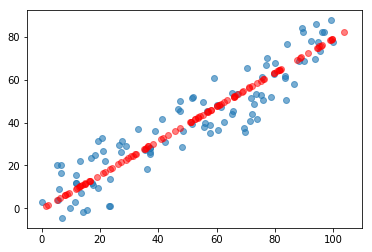

In [92]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.scatter(X_restore[:, 0], X_restore[:, 1], color='r', alpha=0.5)
plt.show()  #还原后的数据已成为一根轴，不具有原来的分布（信息损失）

# 对digits数据使用sklearn中的PCA

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [109]:
X_train.shape

(1347, 64)

##### 先使用kNN算法计算识别率

In [110]:
%time
from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier()
kNN_clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [111]:
kNN_clf.score(X_test, y_test)

0.98666666666666669

##### 再使用PCA测试识别率

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #先尝试2种主成分
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [113]:
%%time
kNN_clf = KNeighborsClassifier()
kNN_clf.fit(X_train_reduction, y_train)

Wall time: 2.5 ms


In [114]:
kNN_clf.score(X_test_reduction, y_test)

0.60666666666666669

### explained_variance\_ratio\_：反映各主成分占方差的“权重”

In [115]:
pca.explained_variance_ratio_

array([ 0.14566817,  0.13735469])

In [116]:
pca = PCA(n_components=X_train.shape[1])  #返回所有主成分占方差的“权重”
pca.fit(X_train)
pca.explained_variance_ratio_

array([  1.45668166e-01,   1.37354688e-01,   1.17777287e-01,
         8.49968861e-02,   5.86018996e-02,   5.11542945e-02,
         4.26605279e-02,   3.60119663e-02,   3.41105814e-02,
         3.05407804e-02,   2.42337671e-02,   2.28700570e-02,
         1.80304649e-02,   1.79346003e-02,   1.45798298e-02,
         1.42044841e-02,   1.29961033e-02,   1.26617002e-02,
         1.01728635e-02,   9.09314698e-03,   8.85220461e-03,
         7.73828332e-03,   7.60516219e-03,   7.11864860e-03,
         6.85977267e-03,   5.76411920e-03,   5.71688020e-03,
         5.08255707e-03,   4.89020776e-03,   4.34888085e-03,
         3.72917505e-03,   3.57755036e-03,   3.26989470e-03,
         3.14917937e-03,   3.09269839e-03,   2.87619649e-03,
         2.50362666e-03,   2.25417403e-03,   2.20030857e-03,
         1.98028746e-03,   1.88195578e-03,   1.52769283e-03,
         1.42823692e-03,   1.38003340e-03,   1.17572392e-03,
         1.07377463e-03,   9.55152460e-04,   9.00017642e-04,
         5.79162563e-04,

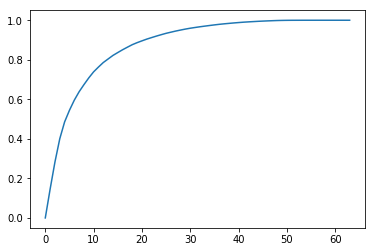

In [122]:
plt.plot([i for i in range(X_train.shape[1])], 
        [np.sum(pca.explained_variance_ratio_[:i]) for i in range(X_train.shape[1])])
plt.show()  #此图反映了前k个主成分所占方差的总和比例

### 对PCA()构造函数指定方差占比

In [124]:
pca = PCA(0.96)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.96, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [125]:
pca.n_components_  #说明前31个主成分所占方差比之和达到了0.96，即降到31维

31

In [126]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca. transform(X_test)

%time
kNN_clf = KNeighborsClassifier()
kNN_clf.fit(X_train_reduction, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
kNN_clf.score(X_test_reduction, y_test)  #表明用31维数据几乎可以代表原来的64维数据

0.98444444444444446

### 可视化：降至二维或三维的作用

In [128]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [129]:
X_reduction.shape

(1797, 2)

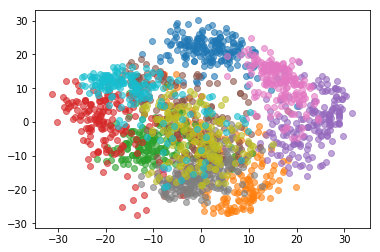

In [147]:
for i in range(10):  #可视化10种digits数据
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.6)
plt.show()

# MNIST数据集

In [27]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [28]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [29]:
X, y = mnist['data'], mnist['target']

In [30]:
X.shape  #60000个样本，10000个标签，28*28=784的图像

(70000, 784)

In [31]:
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [32]:
X_train.shape

(60000, 784)

In [33]:
y_train.shape

(60000,)

In [34]:
X_test.shape

(10000, 784)

In [35]:
y_test.shape

(10000,)

### 使用kNN测试

In [36]:
from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier()
%time kNN_clf.fit(X_train, y_train)

Wall time: 35.2 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
%time kNN_clf.score(X_test, y_test)

Wall time: 11min 17s


0.96879999999999999

### 使用PCA进行降维

In [38]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [39]:
X_train_reduction.shape

(60000, 87)

In [40]:
kNN_clf = KNeighborsClassifier()
%time kNN_clf.fit(X_train_reduction, y_train)

Wall time: 543 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
X_test_reduction = pca.transform(X_test)
%time kNN_clf.score(X_test_reduction, y_test)

Wall time: 1min 20s


0.9728

# 使用PCA进行简单降噪

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

digits = datasets.load_digits()
X = digits.data
y = digits.target

noisy_digits = X + np.random.normal(0, 4, size=X.shape)
example_digits = noisy_digits[y==0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

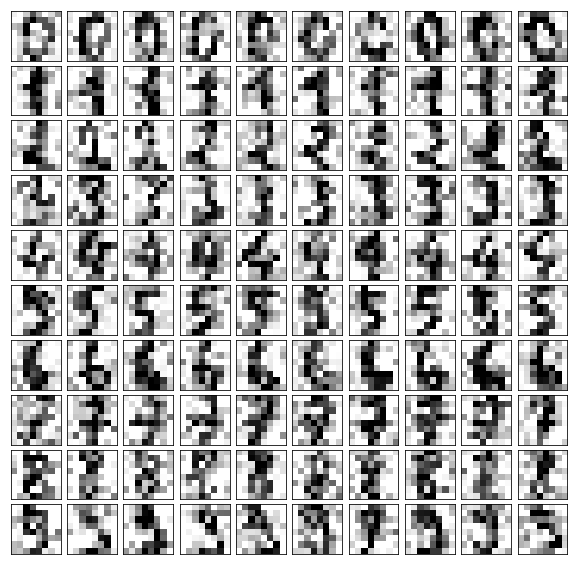

In [22]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest', clim=(0, 16))
    plt.show()
    
plot_digits(example_digits)  #下面是未降噪的图像

### 使用PCA降噪

In [45]:
pca = PCA(0.5)  #目测上述信息噪音较大，所以这里只保留50%的信息
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca.n_components_

12

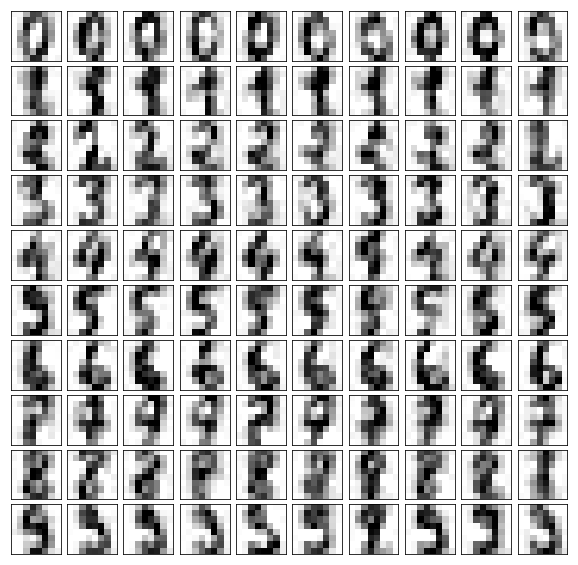

In [47]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

plot_digits(filtered_digits)  #下面是降噪后的图像

# 特征脸：Eigenface

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [49]:
faces = fetch_lfw_people()

In [50]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [51]:
faces.data.shape

(13233, 2914)

In [52]:
faces.images.shape

(13233, 62, 47)

In [53]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

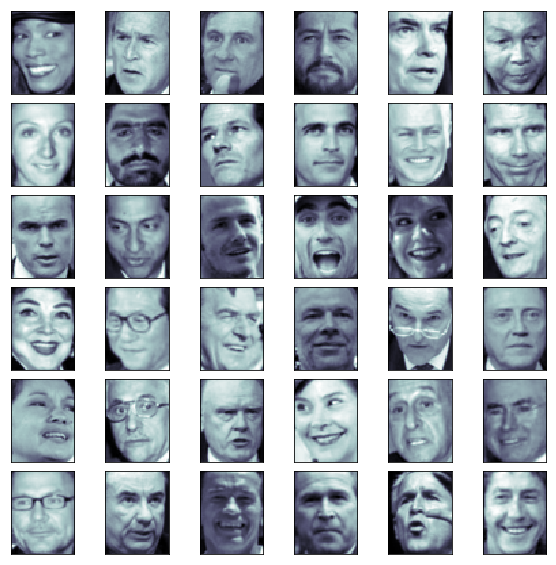

In [54]:
def plot_faces(faces):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

In [55]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'],
      dtype='<U35')

In [56]:
len(faces.target_names)  #一共有5749个人的图片

5749

In [57]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 41.8 s


In [59]:
pca.components_.shape

(2914, 2914)

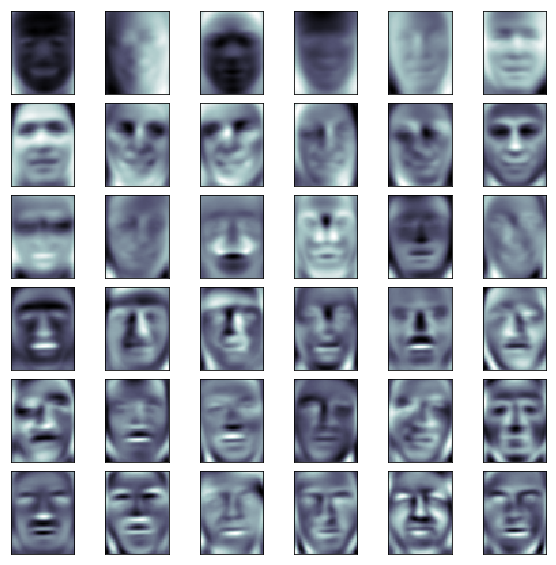

In [60]:
plot_faces(pca.components_[:36, :])  #绘制特征脸

In [61]:
face2 = fetch_lfw_people(min_faces_per_person=30)  #返回图片数量最少为30张的子样本集
face2.data.shape

(2370, 2914)

In [62]:
face2.target_names  #返回这些至少拥有30张图片人的target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Andre Agassi', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Colin Powell', 'David Beckham',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Guillermo Coria', 'Hans Blix',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Capriati', 'John Ashcroft', 'John Negroponte',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Megawati Sukarnoputri',
       'Nestor Kirchner', 'Recep Tayyip Erdogan', 'Roh Moo-hyun',
       'Serena Williams', 'Silvio Berlusconi', 'Tom Ridge', 'Tony Blair',
       'Vicente Fox', 'Vladimir Putin'],
      dtype='<U25')

In [63]:
len(face2.target_names)  #至少拥有30张图片的人数有34人

34